In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import keras

2021-10-13 13:40:32.070452: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [118]:
def show_image_prediction(x, prediction, labels, right_label):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.title(right_label)
    plt.imshow(x.reshape((299,299)), cmap='gray')
    
    plt.subplot(1,2,2)
    p_max = prediction[0].max()
    
    plt.bar(LABELS, prediction[0]/p_max,width = 0.4)

    pred_label_index = np.where(prediction[0]==p_max)[0][0]
    plt.title('NN prediction')
    plt.show()
    
def _show_layer(model, image_bits, layer_index):
    intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[layer_index].output)
        
    output = intermediate_layer_model.predict(image_bits)
    out_max = output.max()

    a = 0
    plt.figure(figsize=(35,100))
    for i in range(output.shape[3]):
        nn_image = output[:,:,:,i][0]
        im_max = nn_image.max()
        if (im_max > 0.0):
            a+=1
            plt.subplot(32,12,a)
            plt.title(i)
            plt.imshow(nn_image, cmap='inferno', vmax=out_max, vmin=0)

def show_inside_layers(model, image_bits, only_last):
    conv2d_indexes = []
    for i, layer in enumerate(model.layers):
        if(isinstance(layer, Conv2D)):
            conv2d_indexes.append(i)
            
    if (only_last):
        _show_layer(model, image_bits, conv2d_indexes[-1])
    else:
        for layer_index in conv2d_indexes:
            _show_layer(model, image_bits, layer_index)

In [3]:
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

X = np.load('X_test.npy')
y = np.load('y_test.npy')

In [27]:
path = '5_1/epoch4.h5'
model = models.load_model('checkpoints/'+path)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 295, 295, 64)      1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 293, 293, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 146, 146, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 146, 146, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 32)        0

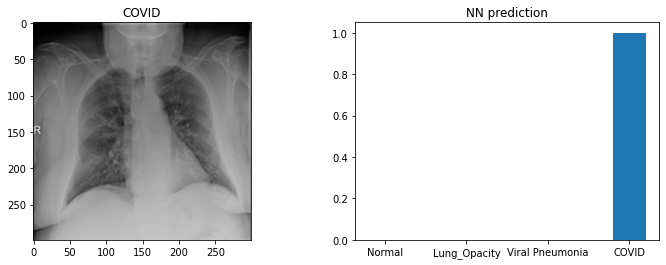

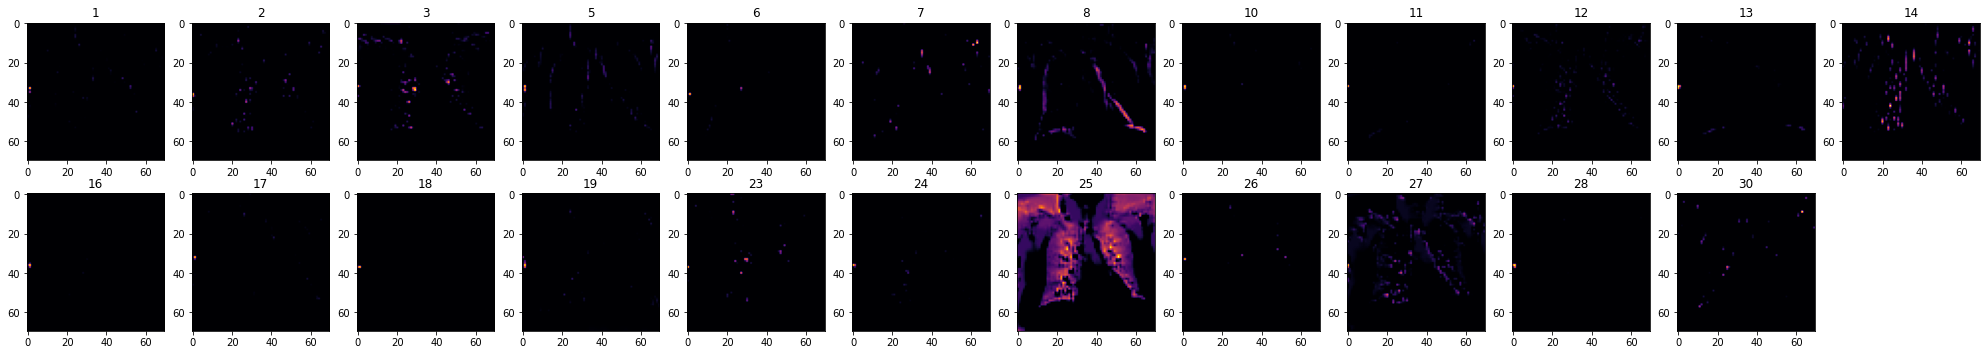

In [65]:
path = '5_1/epoch4.h5'
model = models.load_model('checkpoints/'+path)

# index = random.randrange(len(y))
index = 50
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, True)

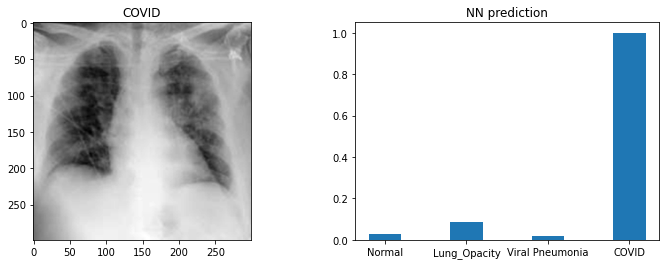

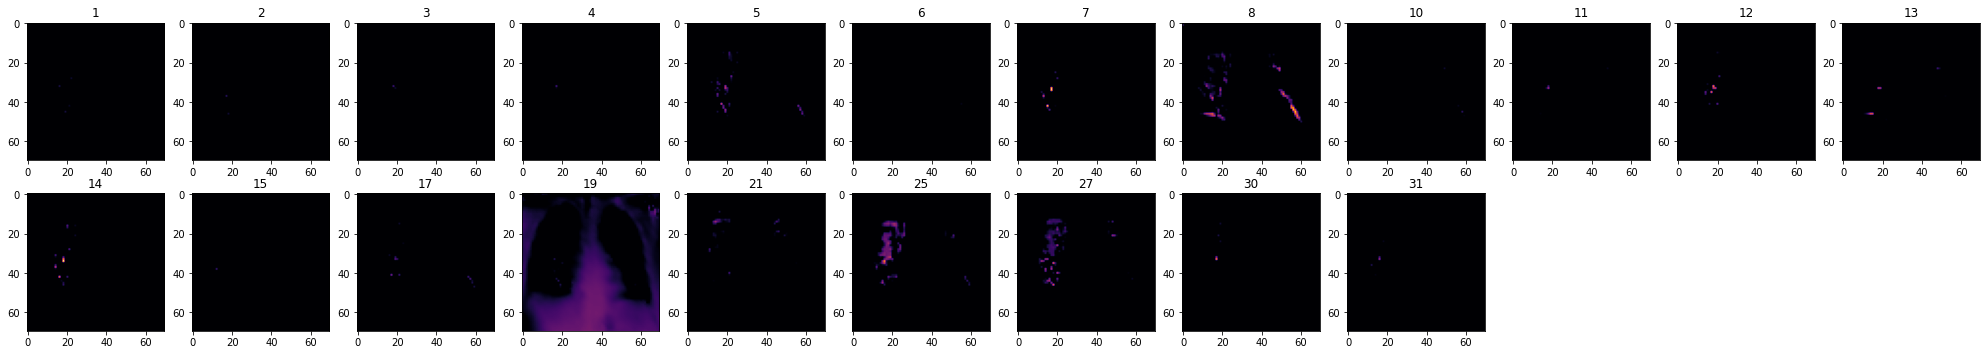

In [121]:
path = '5_1/epoch4.h5'
model = models.load_model('checkpoints/'+path)

# index = random.randrange(len(y))
index = 930
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, True)

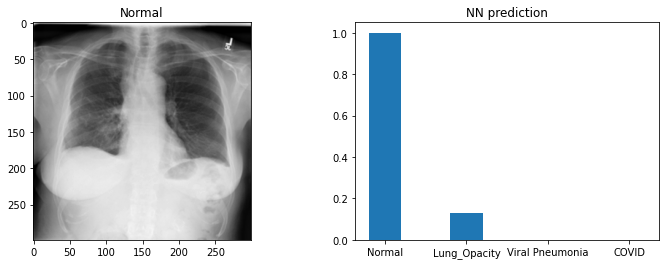

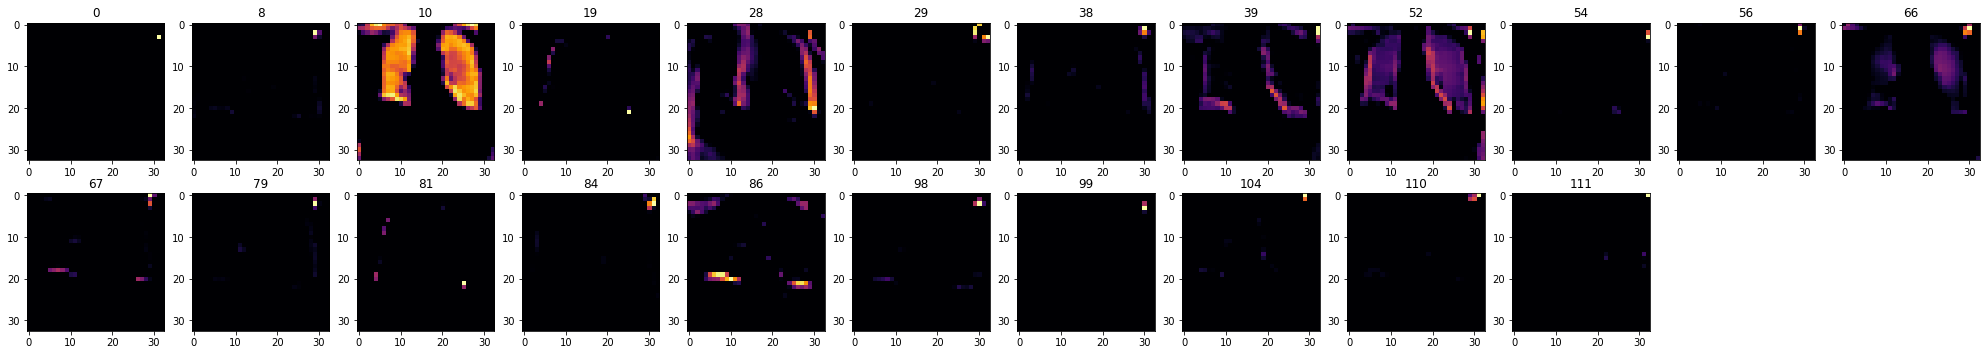

In [69]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

# index = random.randrange(len(y))
index = 50
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, True)

3047


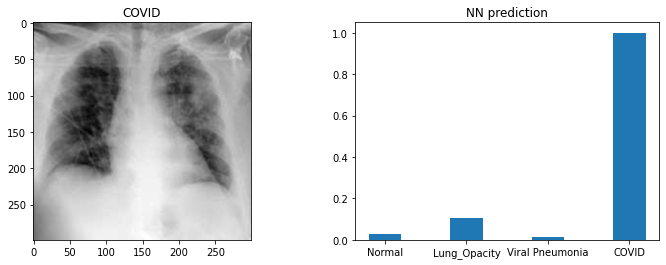

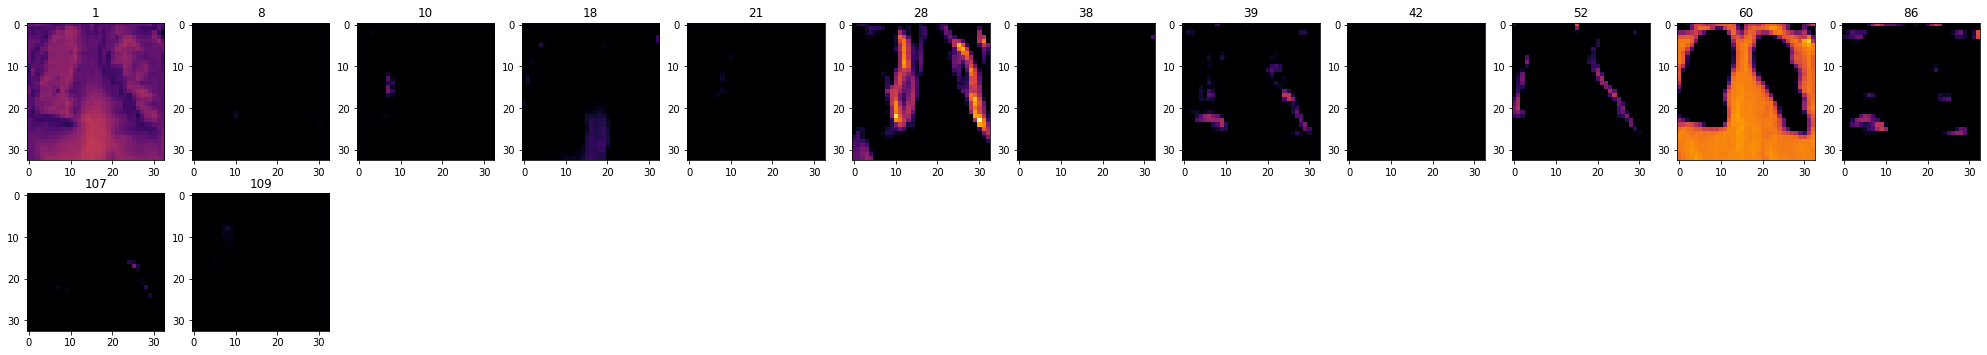

In [120]:
path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

index = random.randrange(len(y))
print(index)
index=930
image_bits = X[index].reshape((1,299,299,1))
right_label = LABELS[np.where(y[index]==1)[0][0]]
prediction = model.predict(image_bits)

show_image_prediction(image_bits, prediction, LABELS, right_label)
show_inside_layers(model, image_bits, True)